# 1. Problem Statement
----------------------------------------------

In [1]:
#Problem Statement
'''
BC Finance aims to automate the real-time process of evaluating a customer's eligibility for a home loan by using the information they supply when submitting an online application. In order to effectively divide clients into segments that are eligible and ineligible for house loans, it is necessary to construct a prediction model that evaluates a variety of characteristics, including gender, marital status, education, income, and credit history.

'''

"\nBC Finance aims to automate the real-time process of evaluating a customer's eligibility for a home loan by using the information they supply when submitting an online application. In order to effectively divide clients into segments that are eligible and ineligible for house loans, it is necessary to construct a prediction model that evaluates a variety of characteristics, including gender, marital status, education, income, and credit history.\n\n"

-----------------------------------
# 2. Hypothesis Generation
-----------------------------------

In [2]:
#Hypothesis Generation
'''
1.	Income Hypothesis: Customers with higher incomes are more likely to be eligible for larger loan amounts compared to those with lower incomes.
2.	Credit History Hypothesis: Customers with a positive credit history are more likely to be eligible for loans compared to those with a negative credit history or no credit history.
3.	Marital Status Hypothesis: Married individuals may have a higher likelihood of loan eligibility compared to single individuals, as they may have more stable financial backgrounds.
4.	Education Hypothesis: Customers with higher levels of education may exhibit more responsible financial behavior and thus have a higher likelihood of loan eligibility.
5.	Gender Hypothesis: There may be differences in loan eligibility based on gender, with one gender potentially having a higher likelihood of loan approval due to various socio-economic factors.
6.	Number of Dependents Hypothesis: Customers with fewer dependents may have a higher likelihood of loan eligibility as they may have more disposable income.
7.	Loan Amount Hypothesis: Customers applying for smaller loan amounts may have a higher likelihood of loan approval compared to those applying for larger loan amounts, due to lower risk for the lender.

'''

'\n1.\tIncome Hypothesis: Customers with higher incomes are more likely to be eligible for larger loan amounts compared to those with lower incomes.\n2.\tCredit History Hypothesis: Customers with a positive credit history are more likely to be eligible for loans compared to those with a negative credit history or no credit history.\n3.\tMarital Status Hypothesis: Married individuals may have a higher likelihood of loan eligibility compared to single individuals, as they may have more stable financial backgrounds.\n4.\tEducation Hypothesis: Customers with higher levels of education may exhibit more responsible financial behavior and thus have a higher likelihood of loan eligibility.\n5.\tGender Hypothesis: There may be differences in loan eligibility based on gender, with one gender potentially having a higher likelihood of loan approval due to various socio-economic factors.\n6.\tNumber of Dependents Hypothesis: Customers with fewer dependents may have a higher likelihood of loan eligi

-----------------------------------
# 3. System  and Data 
-----------------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

import joblib

from sklearn.inspection import permutation_importance

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [6]:
#Load data into a Pandas DataFrame
df1 = pd.read_csv("./DataSheet/raw_data.csv")

In [7]:

# Display the first few rows of the DataFrame
print(f'{"-"*30}\n'
      f'DataFrame\n'
      f'{"-"*30}\n'
      f'{df1.head()}\n')


# Display data types of columns
print(f'{"-"*30}\n'
      f'Data Types\n'
      f'{"-"*30}\n'
      f'{df1.dtypes}\n')


# Display summary statistics
print(f'\n{"-"*30}\n'
      f'Statistics\n'
      f'{"-"*30}\n'
      f'{df1.describe()}\n')


# Display the shape of the DataFrame
print(f'\n{"-"*30}\n'
      f'Size of the DataFrame\n'
      f'{"-"*30}\n'
      f'Rows: {df1.shape[0]}\n'
      f'Columns: {df1.shape[1]}\n'
      f'{"-"*30}\n')


------------------------------
DataFrame
------------------------------
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban         

-----------------------------------
# 4. Data Anlysis
-----------------------------------

### Univariate Analysis

##### Bar plots of categorical feature

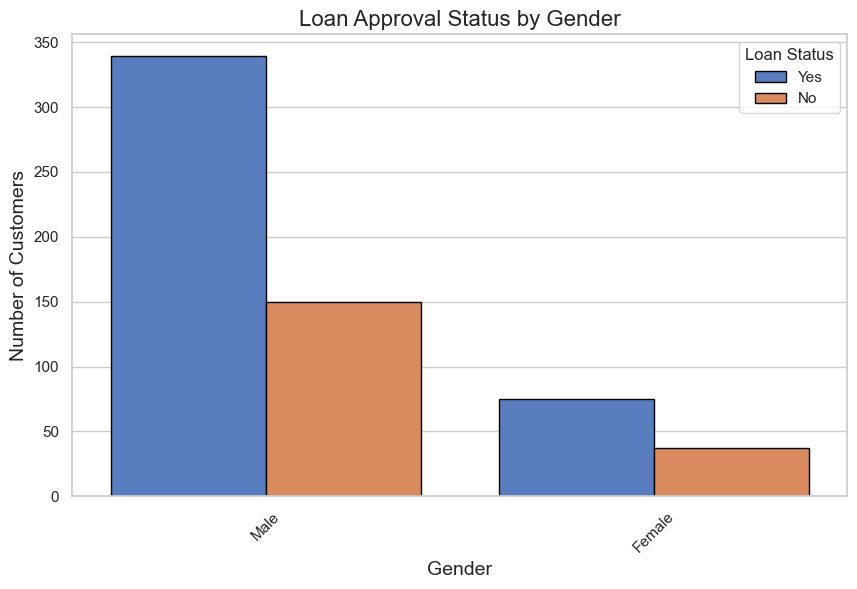

In [8]:
# Set style
sns.set(style="whitegrid")

# Create the count plot with Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df1, hue='Loan_Status', palette='muted', edgecolor='black')

# Customize labels and title
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Loan Approval Status by Gender', fontsize=16)

# Add legend with title
plt.legend(title='Loan Status',labels=['Yes', 'No'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

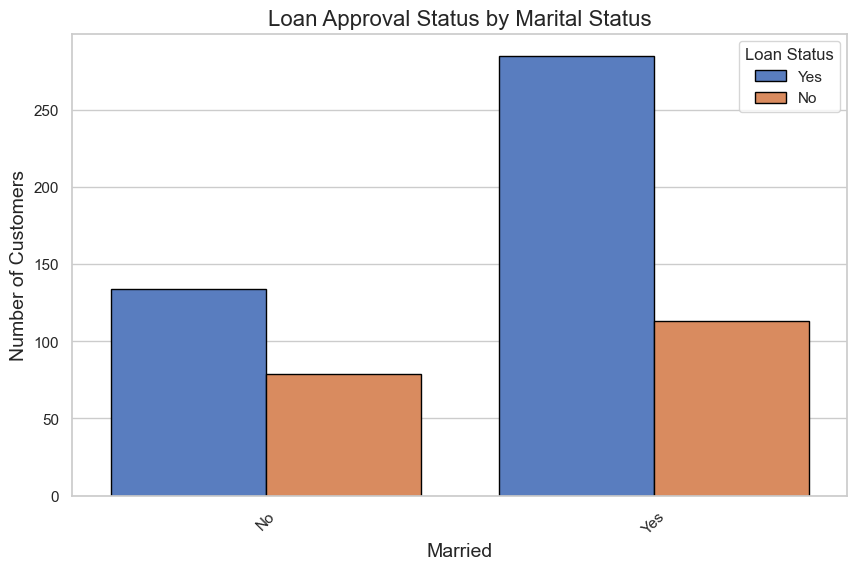

In [9]:
# Set style
sns.set(style="whitegrid")

# Create the count plot with Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=df1, hue='Loan_Status', palette='muted', edgecolor='black')

# Customize labels and title
plt.xlabel('Married', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Loan Approval Status by Marital Status', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with custom location and title
plt.legend(title='Loan Status', loc='upper right',labels=['Yes', 'No'])

# Show plot
plt.show()

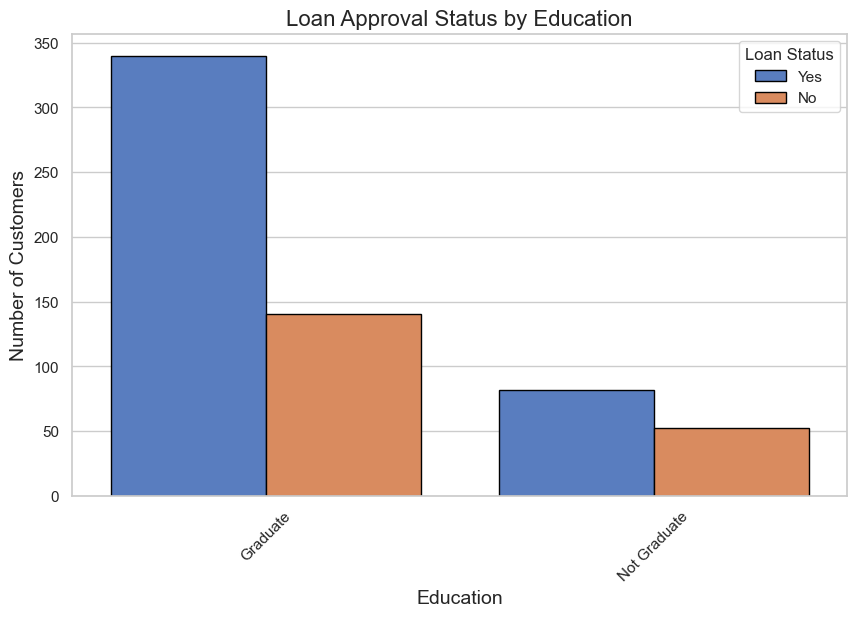

In [10]:
# Set style
sns.set(style="whitegrid")

# Create the count plot with Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df1, hue='Loan_Status', palette='muted', edgecolor='black')

# Customize labels and title
plt.xlabel('Education', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Loan Approval Status by Education', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with custom location and title
plt.legend(title='Loan Status', loc='upper right',labels=['Yes', 'No'])

# Show plot
plt.show()

##### Histograms of  numerical feature

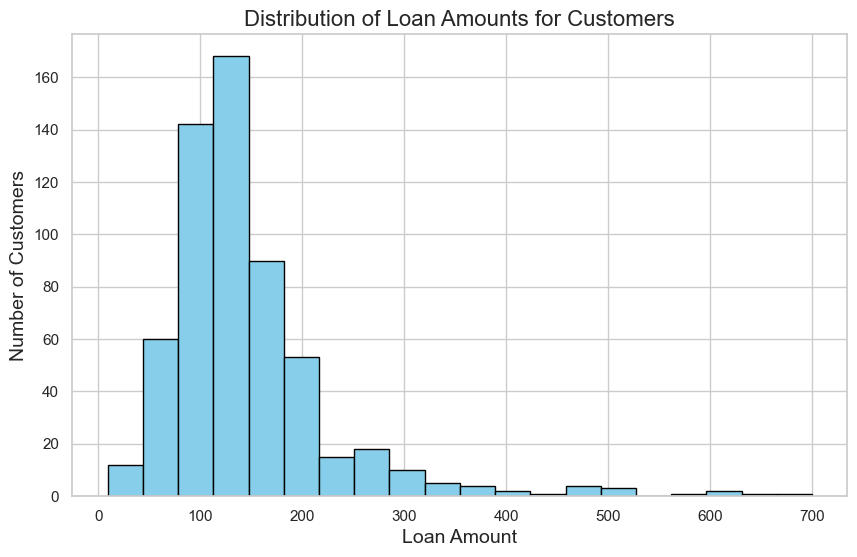

In [11]:
# Create the histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df1['LoanAmount'], bins=20, color='skyblue', edgecolor='black')

# Customize labels and title
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Distribution of Loan Amounts for Customers', fontsize=16)

# Add gridlines
plt.grid(True)

# Show plot
plt.show()

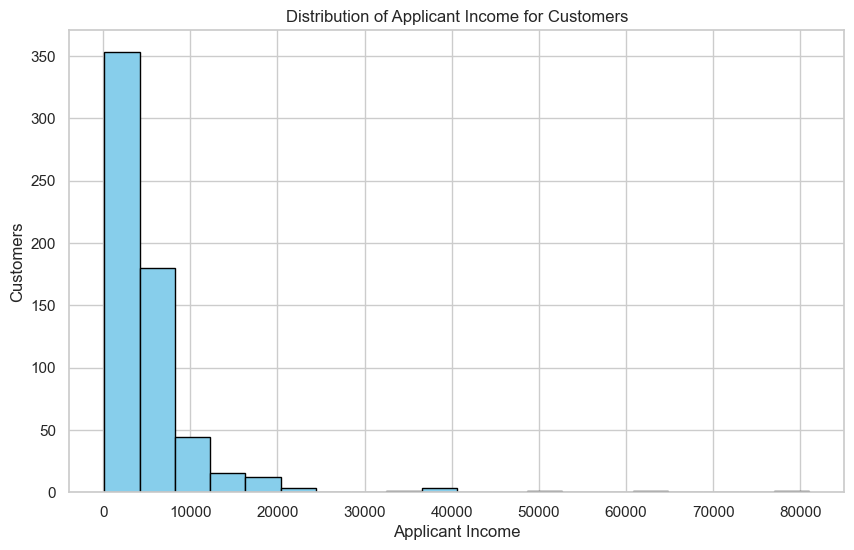

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df1['ApplicantIncome'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Customers')
plt.title('Distribution of Applicant Income for Customers')
plt.grid(True)
plt.show()

### Bivariate Analysis

##### Scatter plot

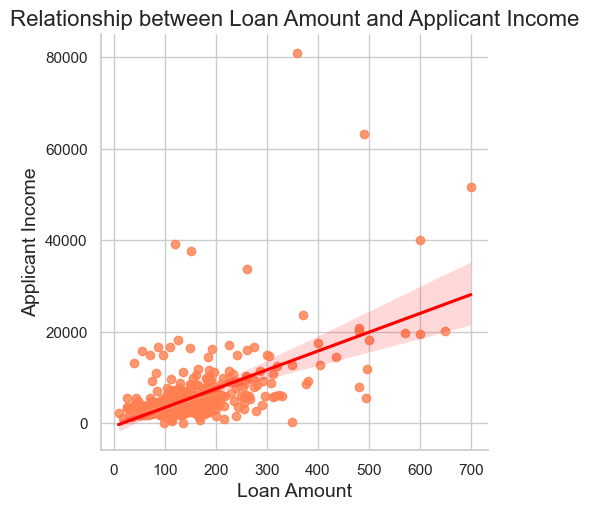

In [13]:

# Set style
sns.set(style="whitegrid")


sns.lmplot(x='LoanAmount', y='ApplicantIncome', data=df1, line_kws={'color': 'red'}, scatter_kws={'color': 'coral'})

# Add labels and title with increased font size
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Applicant Income', fontsize=14)
plt.title('Relationship between Loan Amount and Applicant Income', fontsize=16)

# Show plot
plt.show()

##### Box plot

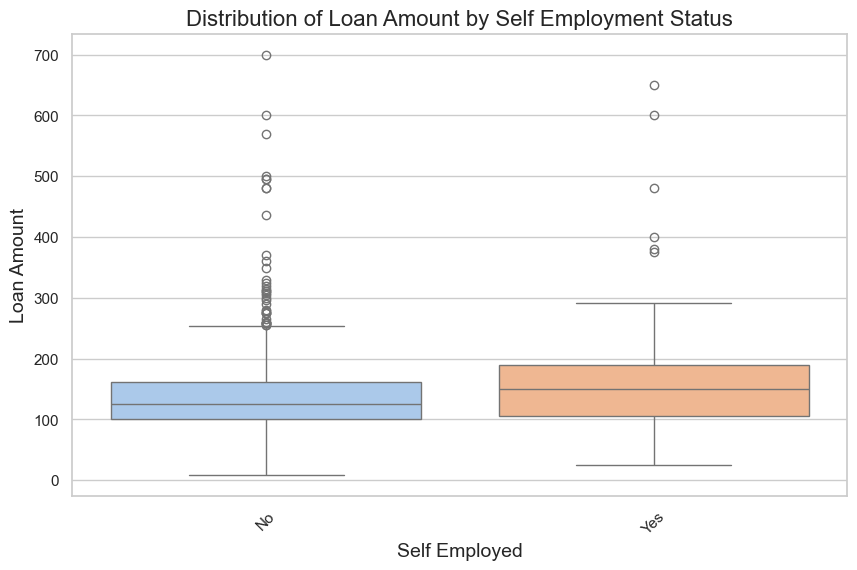

In [14]:
# Set style
sns.set(style="whitegrid")

# Create the box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Self_Employed', y='LoanAmount', data=df1, hue='Self_Employed', palette='pastel', saturation=0.75)

# Customize labels and title
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.title('Distribution of Loan Amount by Self Employment Status', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Hide the legend to declutter the plot
plt.legend().remove()

# Show plot
plt.show()

-----------------------------------
# 5. Missing Value and Outliers
-----------------------------------

##### Missing Values

In [15]:
#  Checking for Missing Values in DataFrame
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Impute categorical features with mode
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']
for feature in categorical_features:
    df1[feature] = df1[feature].fillna(df1[feature].mode()[0])

# Impute numerical feature (LoanAmount) with median
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())

# Drop rows with missing values for Credit_History
df1.dropna(subset=['Credit_History'], inplace=True)

#  Checking for Missing Values in DataFrame
df1.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Outliers

In [17]:
# Detect range of values for each column of the dataframe
df1.describe([x*0.1 for x in range(10)])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5466.436170,1530.448440,144.452128,342.595745,0.842199
std,6271.344106,2471.721359,81.805055,63.838715,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
0%,150.000000,0.000000,9.000000,36.000000,0.000000
10%,2243.200000,0.000000,71.300000,300.000000,0.000000
20%,2623.000000,0.000000,96.000000,360.000000,1.000000
30%,3068.300000,0.000000,109.900000,360.000000,1.000000
40%,3411.400000,0.000000,118.000000,360.000000,1.000000
50%,3815.000000,1105.500000,128.000000,360.000000,1.000000


In [18]:
# Filter the DataFrame to include only rows where the specified features are between their respective 10th and 90th percentiles
df2 = df1[
    df1['ApplicantIncome'].between(df1['ApplicantIncome'].quantile(0.1), df1['ApplicantIncome'].quantile(0.9)) &
    df1['CoapplicantIncome'].between(df1['CoapplicantIncome'].quantile(0.1), df1['CoapplicantIncome'].quantile(0.9)) &
    df1['LoanAmount'].between(df1['LoanAmount'].quantile(0.1), df1['LoanAmount'].quantile(0.9)) &
    df1['Loan_Amount_Term'].between(df1['Loan_Amount_Term'].quantile(0.1), df1['Loan_Amount_Term'].quantile(0.9))
]



-----------------------------------
# 6. Evaluation Metrics for classification problem
-----------------------------------

In [19]:
#Evaluation Metrics for classification problem 
"""
Evaluation Metrics for Classification
The process of model building is not complete without the evaluation of model performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We calculate the distance between the predictions and actual values. The lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:
 
•   Accuracy:-  Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is what a confusion matrix looks like:
 
C:\Users\Henko\Documents\MLG382\MLG_Project1\MLG382_Project1_GroupB\Images\Accuracy.png
 
•   True Positive - Targets which are actually true(Y) and we have predicted them as true(Y)
•   True Negative - Targets that are actually false(N) and we have predicted them as false(N)
•   False Positive - Targets that are actually false(N) but we have predicted them as true(T)
•   False Negative - Targets that are actually true(T) but we have predicted them as false(N)
Using these values, we can calculate the accuracy of the model. The accuracy is given by:
 
C:\Users\Henko\Documents\MLG382\MLG_Project1\MLG382_Project1_GroupB\Images\Calculate_Accuracy.png
 
•   Precision:-: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true
                                   Precision = TP / (TP + FP)
•   Recall(Sensitivity):-  It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
                                          Recall = TP / (TP + FN)
•   Specificity:-  It is a measure of how many observations of false class are labeled correctly.
                                         Specificity = TN / (TN + FP)
   Specificity and Sensitivity play a crucial role in deriving the ROC curve.
•   ROC curve
•   Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade-offs between true positive rate (sensitivity) and false-positive rate(1- specificity).
•   The area under the curve (AUC), referred to as an index of accuracy(A) or concordance index, is a perfect performance metric for the ROC curve. Higher the area under the curve, the better the prediction power of the model.
This is what a ROC curve looks like:
 
C:\Users\Henko\Documents\MLG382\MLG_Project1\MLG382_Project1_GroupB\Images\ROC_Graph.png
 
•   The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
•   So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
•   We want to increase the area of the curve which will be maximum for classes 2,3,4 and 5 in the above example.
•   For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false-positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
•   The class 2,3,4 and 5 models will predict more accurately as compared to the class 0 and 1 models as the AUC is more for those classes.
 
 
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 673-674: truncated \UXXXXXXXX escape (2546159380.py, line 2)

-----------------------------------
# 7. Model building: part 1 
### (Apply Deep Learning classification algorithm without step 8)
-----------------------------------

In [ ]:
def prepare_data():
    # Load the dataset
    df = pd.read_csv("./DataSheet/raw_data.csv")

    # Fill missing values in categorical features with mode
    categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']
    for feature in categorical_features:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

    # Impute numerical feature (LoanAmount) with median
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

    # Drop rows with missing values for Credit_History
    df.dropna(subset=['Credit_History'], inplace=True)

    # Drop rows based on 'Loan_ID' column
    df.drop(columns=['Loan_ID'], inplace=True)

    # Filtering data based on quantiles
    df = df[
        df['ApplicantIncome'].between(df['ApplicantIncome'].quantile(0.1), df['ApplicantIncome'].quantile(0.9)) &
        df['CoapplicantIncome'].between(df['CoapplicantIncome'].quantile(0.1), df['CoapplicantIncome'].quantile(0.9)) &
        df['LoanAmount'].between(df['LoanAmount'].quantile(0.1), df['LoanAmount'].quantile(0.9)) &
        df['Loan_Amount_Term'].between(df['Loan_Amount_Term'].quantile(0.1), df['Loan_Amount_Term'].quantile(0.9))
    ]

    return df

In [ ]:
# Prepare the data
df = prepare_data()

# Splitting features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with one-hot encoding, standard scaling, and FNN
model_1 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),  # One-hot encode categorical features
    
    MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)  # FNN with 2 hidden layers
)

# Train the model
model_1.fit(X_train, y_train)

# Evaluate the model
accuracy = model_1.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))




Accuracy: 87.30%


### hyper-parameter 

In [ ]:
# Prepare the data
df = prepare_data()

# Splitting features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with one-hot encoding
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),  # One-hot encode categorical features
    StandardScaler(with_mean=False),  # Do not center sparse matrices
    MLPClassifier(random_state=42)  # FNN with default hyper-parameters
)

# Define hyper-parameter grid
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__max_iter': [500, 1000, 1500],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)


c:\Users\Nadrian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50, 50), 'mlpclassifier__max_iter': 500}


-----------------------------------
# 8. Feature engineering
-----------------------------------

In [ ]:
#  Feature engineering

# Create 'Total_Income'
df2['Total_Income'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']

# Calculate 'Loan to Income Ratio'
df2['Loan_to_Income_Ratio'] = df2['LoanAmount'] / df2['Total_Income']

# Loan_Percentage: Calculate the percentage of LoanAmount with respect to the TotalIncome
df2['Loan_Percentage'] = (df2['LoanAmount'] / df2['TotalIncome']) * 100




-----------------------------------
# 9. Model building: part 2
### (Apply Deep Learning classification algorithm with step 8)
-----------------------------------

In [ ]:
# Function that create the prepared data with  the cleaning as well as  feature engineering 

def prepare_data_NF():
    # Load the dataset
    df = pd.read_csv("./DataSheet/raw_data.csv")

    # Fill missing values in categorical features with mode
    categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']
    for feature in categorical_features:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

    # Impute numerical feature (LoanAmount) with median
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

    # Create 'Total_Income'
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Calculate 'Loan to Income Ratio'
    df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

    # Loan_Percentage: Calculate the percentage of LoanAmount with respect to the TotalIncome
    df['Loan_Percentage'] = (df['LoanAmount'] / df['Total_Income']) * 100

    # Drop rows with missing values for Credit_History
    df.dropna(subset=['Credit_History'], inplace=True)

    # Drop rows based on 'Loan_ID' column
    df.drop(columns=['Loan_ID'], inplace=True)

    # Filtering data based on quantiles
    df = df[
        df['ApplicantIncome'].between(df['ApplicantIncome'].quantile(0.1), df['ApplicantIncome'].quantile(0.9)) &
        df['CoapplicantIncome'].between(df['CoapplicantIncome'].quantile(0.1), df['CoapplicantIncome'].quantile(0.9)) &
        df['LoanAmount'].between(df['LoanAmount'].quantile(0.1), df['LoanAmount'].quantile(0.9)) &
        df['Loan_Amount_Term'].between(df['Loan_Amount_Term'].quantile(0.1), df['Loan_Amount_Term'].quantile(0.9))
    ]

    

    return df

In [ ]:
# Model building

# Prepare the data
df = prepare_data_NF()

# Splitting features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with one-hot encoding, standard scaling, and FNN
model_2 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),  # One-hot encode categorical features
    
    MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)  # FNN with 2 hidden layers
)

# Train the model
model_2.fit(X_train, y_train)

# Evaluate the model
accuracy = model_2.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 88.89%


### Feature Importance

In [ ]:
# Extracting weights from the trained MLP model
weights = model_2.named_steps['mlpclassifier'].coefs_

# Calculate feature importance
feature_importance = np.abs(weights[0]).sum(axis=1)  # Summing weights of input layer

# Code to map feature names to importance values (assuming OneHotEncoder was used)
ohe = model_2.named_steps['onehotencoder']
categorical_feature_names = ohe.get_feature_names_out(input_features=X_train.columns)

# Mapping importance values to original categorical feature names
original_feature_importance = {}
for original_feature in X_train.columns:
    indices = [i for i, feature_name in enumerate(categorical_feature_names) if feature_name.startswith(original_feature)]
    original_feature_importance[original_feature] = feature_importance[indices].sum()

# Sorting features by importance
sorted_features = sorted(original_feature_importance.items(), key=lambda x: x[1], reverse=True)

# Printing sorted feature importance
print("Feature Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importance:
Loan_to_Income_Ratio: 481.3869
Loan_Percentage: 478.0212
Total_Income: 441.7797
ApplicantIncome: 423.5700
CoapplicantIncome: 226.0042
LoanAmount: 191.2628
Dependents: 8.0798
Property_Area: 6.0644
Credit_History: 5.9626
Self_Employed: 4.6808
Education: 4.6296
Gender: 4.4267
Married: 4.2189
Loan_Amount_Term: 3.8671


In [ ]:
# Selecting top 5 most important features
top_features = df_feature_importance.nlargest(5, 'Importance')

# Scaling up the importance values and converting to percentage
top_features['Importance'] *= scaling_factor
total_importance = top_features['Importance'].sum()
top_features['Importance'] = (top_features['Importance'] / total_importance) * 100

# Plotting the top 5 most important features with importance expressed as percentage
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Adding data labels
for index, value in enumerate(top_features['Importance']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'nlargest'

In [ ]:
# Convert original feature importance dictionary to DataFrame
df_original_feature_importance = pd.DataFrame(original_feature_importance.items(), columns=['Feature', 'Importance'])

# Save feature importances to a CSV file
df_original_feature_importance.to_csv('./artifacts/feature_importances.csv', index=False)

In [ ]:
# Save the trained model using joblib

'''
joblib.dump(model_1, 'model_1.pkl')
joblib.dump(model_2, 'model_2.pkl')
'''

['model_2.pkl']

### Predicting the validation file

In [ ]:


def predict_data(data):
    # Load the dataset
    df = data

    # Fill missing values in categorical features with mode
    categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']
    for feature in categorical_features:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

    # Impute numerical feature (LoanAmount) with median
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

    # Create 'Total_Income'
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Calculate 'Loan to Income Ratio'
    df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

    # Loan_Percentage: Calculate the percentage of LoanAmount with respect to the TotalIncome
    df['Loan_Percentage'] = (df['LoanAmount'] / df['Total_Income']) * 100

    # Drop rows with missing values for Credit_History
    df.dropna(subset=['Credit_History'], inplace=True)

    # Drop rows based on 'Loan_ID' column
    df.drop(columns=['Loan_ID'], inplace=True)

    # Filtering data based on quantiles
    df = df[
        df['ApplicantIncome'].between(df['ApplicantIncome'].quantile(0.1), df['ApplicantIncome'].quantile(0.9)) &
        df['CoapplicantIncome'].between(df['CoapplicantIncome'].quantile(0.1), df['CoapplicantIncome'].quantile(0.9)) &
        df['LoanAmount'].between(df['LoanAmount'].quantile(0.1), df['LoanAmount'].quantile(0.9)) &
        df['Loan_Amount_Term'].between(df['Loan_Amount_Term'].quantile(0.1), df['Loan_Amount_Term'].quantile(0.9))
    ]

    

    return df

predicts = model_2.predict(predict_data(pd.read_csv('./DataSheet/validation.csv')))
print(predicts)



['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [ ]:
# Save the predictions  using joblib
# joblib.dump(predicts, 'predictions.csv')


['predictions.csv']

-----------------------------------
# 10. Model deployment
-----------------------------------

In [ ]:


# Load the trained model
model = joblib.load("./artifacts/model_2.pkl")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(
    style={'backgroundColor': '#f2f2f2', 'padding': '20px'},
    children=[
        html.H1("Loan Eligibility Predictor", style={'textAlign': 'center', 'fontSize': '36px', 'color': '#333333'}),
        html.Div(
            style={'margin-bottom': '20px'},
            children=[
                html.H2("Personal Information", style={'fontSize': '24px', 'color': '#333333'}),
                html.Div([
                    html.Label('Gender:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='gender',
                        options=[
                            {'label': 'Male', 'value': 'Male'},
                            {'label': 'Female', 'value': 'Female'}
                        ],
                        value='Male',
                    ),
                ]),
                html.Div([
                    html.Label('Married:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='married',
                        options=[
                            {'label': 'Yes', 'value': 'Yes'},
                            {'label': 'No', 'value': 'No'}
                        ],
                        value='Yes',
                    ),
                ]),
                html.Div([
                    html.Label('Dependents:', style={'fontSize': '18px'}),
                    dcc.Input(
                        id='dependents',
                        type='number',
                        value=0,
                    ),
                ]),
                html.Div([
                    html.Label('Education:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='education',
                        options=[
                            {'label': 'Graduate', 'value': 'Graduate'},
                            {'label': 'Not Graduate', 'value': 'Not Graduate'}
                        ],
                        value='Graduate',
                    ),
                ]),
                html.Div([
                    html.Label('Self Employed:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='self_employed',
                        options=[
                            {'label': 'Yes', 'value': 'Yes'},
                            {'label': 'No', 'value': 'No'}
                        ],
                        value='No',
                    ),
                ]),
            ],
        ),
        html.Div(
            style={'margin-bottom': '20px'},
            children=[
                html.H2("Financial Information", style={'fontSize': '24px', 'color': '#333333'}),
                html.Div([
                    html.Label('Applicant Income:', style={'fontSize': '18px'}),
                    dcc.Input(
                        id='applicant_income',
                        type='number',
                        value=5000,
                    ),
                ]),
                html.Div([
                    html.Label('Coapplicant Income:', style={'fontSize': '18px'}),
                    dcc.Input(
                        id='coapplicant_income',
                        type='number',
                        value=0,
                    ),
                ]),
                html.Div([
                    html.Label('Loan Amount:', style={'fontSize': '18px'}),
                    dcc.Input(
                        id='loan_amount',
                        type='number',
                        value=100000,
                    ),
                ]),
                html.Div([
                    html.Label('Loan Amount Term:', style={'fontSize': '18px'}),
                    dcc.Input(
                        id='loan_amount_term',
                        type='number',
                        value=360,
                    ),
                ]),
                html.Div([
                    html.Label('Credit History:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='credit_history',
                        options=[
                            {'label': 'Yes', 'value': 1},
                            {'label': 'No', 'value': 0}
                        ],
                        value=1,
                    ),
                ]),
                html.Div([
                    html.Label('Property Area:', style={'fontSize': '18px'}),
                    dcc.Dropdown(
                        id='property_area',
                        options=[
                            {'label': 'Urban', 'value': 'Urban'},
                            {'label': 'Semiurban', 'value': 'Semiurban'},
                            {'label': 'Rural', 'value': 'Rural'}
                        ],
                        value='Urban',
                    ),
                ]),
            ],
        ),
        html.Button('Check Eligibility', id='submit-val', n_clicks=0, style={'width': '100%', 'fontSize': '20px'}),
        html.Div(id='output-state', style={'margin-top': '20px', 'fontSize': '24px', 'textAlign': 'center'})
    ]
)

# Define callback to predict loan eligibility
@app.callback(
    Output('output-state', 'children'),
    [
        Input('submit-val', 'n_clicks'),
        Input('gender', 'value'),
        Input('married', 'value'),
        Input('dependents', 'value'),
        Input('education', 'value'),
        Input('self_employed', 'value'),
        Input('applicant_income', 'value'),
        Input('coapplicant_income', 'value'),
        Input('loan_amount', 'value'),
        Input('loan_amount_term', 'value'),
        Input('credit_history', 'value'),
        Input('property_area', 'value'),
    ]
)
def update_output(n_clicks, gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area):
    # Convert input values to appropriate data types
    dependents = str(dependents) if dependents is not None else None
    applicant_income = int(applicant_income) if applicant_income is not None else None
    coapplicant_income = int(coapplicant_income) if coapplicant_income is not None else None
    loan_amount = float(loan_amount) if loan_amount is not None else None
    loan_amount_term = float(loan_amount_term) if loan_amount_term is not None else None
    credit_history = float(credit_history) if credit_history is not None else None

    df = pd.DataFrame({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Property_Area': [property_area]
    })

    # Create 'Total_Income'
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Calculate 'Loan to Income Ratio'
    df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

    # Loan_Percentage: Calculate the percentage of LoanAmount with respect to the TotalIncome
    df['Loan_Percentage'] = (df['LoanAmount'] / df['Total_Income']) * 100

    # Predict loan eligibility
    prediction = model.predict(df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income', 'Loan_to_Income_Ratio', 'Loan_Percentage']])


    if prediction[0] == 'Y':
        return html.Span('Congratulations! You are eligible for a loan.', style={'color': 'green'})
    else:
        return html.Span('Sorry! You are not eligible for a loan.', style={'color': 'red'})


if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[12], line 187, in update_output(
    n_clicks=0,
    gender='Male',
    married='Yes',
    dependents='0',
    education='Graduate',
    self_employed='No',
    applicant_income=5000,
    coapplicant_income=0,
    loan_amount=100000.0,
    loan_amount_term=360.0,
    credit_history=1.0,
    property_area='Urban'
)
    184 df['Loan_Percentage'] = (df['LoanAmount'] / df['Total_Income']) * 100
    186 # Predict loan eligibility
--> 187 prediction = model.predict(df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income', 'Loan_to_Income_Ratio', 'Loan_Percentage']])
        df =   Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male     Yes          0  Graduate            No 